# Packages/Modules


In [1]:
!python --version

Python 3.9.5


In [2]:
!pip --version

pip 24.0 from E:\Python Projects\GaussParse\venv\lib\site-packages\pip (python 3.9)



In [3]:
# import packages/modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import os
import re
import csv
# added
import shutil

# Util


Check file format


In [4]:
def CheckFileFormat(filePath):
    '''
    check file format

    args:
        filePath: file name dir

    return:
        file directory, file name, file format
    '''
    # check file exist
    if os.path.isfile(filePath):
        # file analysis
        fileDir = os.path.dirname(filePath)
        fileNameWithExtension = os.path.basename(filePath)
        fileName, fileExtension = os.path.splitext(fileNameWithExtension)
        # res
        return fileDir, fileName, fileExtension
    else:
        raise Exception('file path is not valid.')

Load files


In [5]:
def ListFiles(targetPath, fileExtension='txt'):
    '''
    list files in a target file

    args:
        targetPath: target path
        fileExtension: file extention, default is empty

    return:
        a list of files in the target path
    '''
    try:
        # check
        if os.path.exists(targetPath):
            filesFound = []
            for f in os.listdir(targetPath):
                if f.endswith('.'+str(fileExtension)):
                    filesFound.append(f)
            # res
            return filesFound
        else:
            raise Exception("target path is not valid.")

    except Exception as e:
        raise

# Load IRC Gaussian log file


get current directory


In [6]:
# current directory
os.getcwd()

'e:\\Python Projects\\GaussParse\\GaussParse\\notebook'

load file


In [7]:
# irc file
irc_file = 'g09_exp - for GaussParse.log'
file_name, file_extension = irc_file.split(".")
print(f"file name: {file_name}")
print(f"file extension: {file_extension}")

file name: g09_exp - for GaussParse
file extension: log


Load files in a folder


In [8]:
# log dir
target_folder = "D:\\OneDrive\\Project Analysis\\Computational Chemistry\\analysis\\terpens epoxidation\\irc"

# list files
file_list = ListFiles(target_folder, "log")
print("res:", file_list)
print("count: ", len(file_list))

res: ['g09_exp.log']
count:  1


# Read file


In [9]:
def ReadIRC(filePath):
    '''
    read the content of log file

    args:
      filePath: full name of file with directory and format

    return:
        res: dict
    '''
    try:
        # file info
        fileDir, fileName, fileExtension = CheckFileFormat(filePath)

        # dict
        item_loc = []
        item_conv = []
        column_names = ['X', 'Energy', 'RxCoord']

        # index
        k = 1

        # file open
        with open(filePath, "r") as f:
            # content
            fContent = f.read()
            # find
            str_sub_1 = "Energies reported relative to the TS energy of "
            i_sub_1 = fContent.rfind(str_sub_1)
            str_1 = fContent[i_sub_1:]

            # split str by lines
            str_sub_lines = str_1.splitlines()

            # energy
            E_pattern = r"([-+]?\d*\.\d+|\d+)"
            E_match = re.search(E_pattern, str_sub_lines[0])
            if E_match:
                E = float(E_match.group())
                print(E)
            else:
                print("not found: Energies reported relative to the TS energy")
                raise

            # separator
            sep_1 = str_sub_lines[1]
            # table header
            table_header = str_sub_lines[2]

            # find the second separator
            k = 0
            k_set = 4
            for item in str_sub_lines:
                # set regex
                _line = item

                # find
                _res = re.search(
                    r"(\d+)\s+([-+]?\d*\.\d+|\d+)\s+([-+]?\d*\.\d+|\d+)", _line)
                # check
                if _res:
                    _X = _res.group(1)
                    _Energy = _res.group(2)
                    _RxCoord = _res.group(3)
                    # store
                    _ele = {
                        'X': int(_X),
                        'Energy': float(_Energy),
                        'RxCoord': float(_RxCoord),
                        'EnergyTotal': float(_Energy) + E,
                    }

                    item_loc.append(_ele)

                # check the end of data zone
                if k > k_set and item == sep_1:
                    sep_2 = item
                    break

                # update
                k += 1

        return fileName, item_loc, column_names
    except Exception as e:
        raise

In [10]:
def AnalyzeIRC(targetPath, fileList):
    '''
    analyze every file in the file list

    args:
        targetPath {str}: target folder
        fileList {array(str)}: list of selected files

    return:
        res: dict
    '''
    try:
        # check
        if len(fileList) > 0:
            # res
            res = []
            for item in fileList:
                # file path
                _file_full_path = os.path.join(str(targetPath), str(item))
                # read file
                _res = ReadIRC(_file_full_path)
                # save
                res.append(_res)

            # return
            return res
        else:
            raise Exception("file list is empty!")

    except Exception as e:
        raise

In [11]:
log_res = AnalyzeIRC(target_folder, file_list)
print(log_res)

-1384.660426
[('g09_exp', [{'X': 1, 'Energy': -0.0307, 'RxCoord': -8.92309, 'EnergyTotal': -1384.691126}, {'X': 2, 'Energy': -0.03068, 'RxCoord': -8.7442, 'EnergyTotal': -1384.691106}, {'X': 3, 'Energy': -0.03065, 'RxCoord': -8.56523, 'EnergyTotal': -1384.6910759999998}, {'X': 4, 'Energy': -0.03062, 'RxCoord': -8.38645, 'EnergyTotal': -1384.691046}, {'X': 5, 'Energy': -0.03059, 'RxCoord': -8.20802, 'EnergyTotal': -1384.691016}, {'X': 6, 'Energy': -0.03055, 'RxCoord': -8.03101, 'EnergyTotal': -1384.6909759999999}, {'X': 7, 'Energy': -0.03051, 'RxCoord': -7.85494, 'EnergyTotal': -1384.690936}, {'X': 8, 'Energy': -0.03047, 'RxCoord': -7.67951, 'EnergyTotal': -1384.6908959999998}, {'X': 9, 'Energy': -0.03042, 'RxCoord': -7.50343, 'EnergyTotal': -1384.690846}, {'X': 10, 'Energy': -0.03036, 'RxCoord': -7.32656, 'EnergyTotal': -1384.690786}, {'X': 11, 'Energy': -0.03029, 'RxCoord': -7.14857, 'EnergyTotal': -1384.6907159999998}, {'X': 12, 'Energy': -0.03022, 'RxCoord': -6.97019, 'EnergyTotal':

# Display


In [12]:
# first data
data_0 = log_res[0][1]
# dataframe
df = pd.DataFrame(data_0)
df.head()

,X,Energy,RxCoord,EnergyTotal
0,1,-0.03070,-8.92309,-1384.691126
1,2,-0.03068,-8.74420,-1384.691106
2,3,-0.03065,-8.56523,-1384.691076
3,4,-0.03062,-8.38645,-1384.691046
4,5,-0.03059,-8.20802,-1384.691016


In [13]:
df.tail()

,X,Energy,RxCoord,EnergyTotal
169,170,-0.12418,21.22953,-1384.784606
170,171,-0.12424,21.40613,-1384.784666
171,172,-0.12431,21.58369,-1384.784736
172,173,-0.12439,21.76058,-1384.784816
173,174,-0.12442,21.83441,-1384.784846


plot data


In [14]:
# X
_X = df['RxCoord']
X = _X.to_numpy()
X[0:10]

array([-8.92309, -8.7442 , -8.56523, -8.38645, -8.20802, -8.03101,
       -7.85494, -7.67951, -7.50343, -7.32656])

In [15]:
# Y
_Y = df['EnergyTotal']
Y = _Y.to_numpy()
Y[0:10]

array([-1384.691126, -1384.691106, -1384.691076, -1384.691046,
       -1384.691016, -1384.690976, -1384.690936, -1384.690896,
       -1384.690846, -1384.690786])

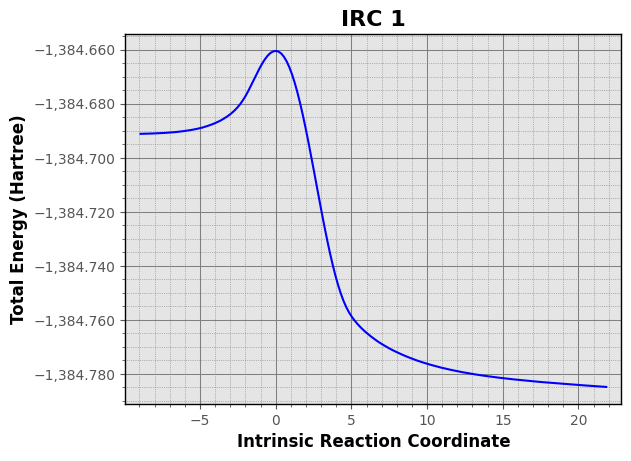

In [18]:
# Add a title to the plot
plt.title('IRC 1', fontweight='bold', color='black', fontsize=16)
# styles
plt_styles = ['bmh', 'dark_background', 'seaborn-v0_8', 'ggplot']
plt.style.use(plt_styles[3])
# axe labels
plt.xlabel("Intrinsic Reaction Coordinate", fontweight='bold', color='black')
plt.ylabel("Total Energy (Hartree)", fontweight='bold', color='black')
# grid
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
# Enable minor ticks
plt.minorticks_on()
# Customize major grid lines
plt.grid(which='major', color='grey', linestyle='-', linewidth=0.75)
# Customize minor grid lines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
# plot data
plt.plot(X, Y, color='blue')
# save a figure
img_path = os.path.join(target_folder, 'my_plot.svg')
# svg
# plt.savefig(img_path, facecolor='white')
# Save using the format parameter
jpeg_img_path = os.path.join(target_folder, 'my_plot.png')
plt.savefig(jpeg_img_path, facecolor='white', dpi=300, bbox_inches='tight')
# Customize major tick marks for the current axes
# plt.gca().tick_params(axis='both', which='major', length=5, width=1, colors='black', direction='in', labelsize=10)
# Customize minor tick marks for the current axes
# plt.gca().tick_params(axis='both', which='minor', length=5, width=1, colors='gray', direction='in', labelsize=10)
# Set the y-axis limits to display the actual values
# Set the y-tick labels to display the actual values
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.3f}'))
# Customize the appearance of the spines
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
# Set the minimum and maximum values for the x-axis
plt.xlim(min(X)-1, max(X)+1)  # Adjust the values as needed
# show
plt.show()